# Insper - Modelagem e Simulação do Mundo Físico  

## Projeto 3 - Lançamento Oblíquo de uma Bola de Futebol com Rotação
---
---

In [1]:
# Importa bibliotecas necessárias
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as patches
import pandas
from matplotlib import animation
import matplotlib.patches as patches

---
---
# Modelos, validação e gráficos

---
---
## Modelo desconsiderando a rotação

---
### Código do modelo inicial com equações:

In [2]:
def modelo(lista, t):
    x, y, vx, vy = lista[0], lista[1], lista[2], lista[3]
    V = math.sqrt(vx ** 2 + vy ** 2)
     
    # Equações de posição
    dxdt = vx
    dydt = vy
  
    # Equações de velocidade
    dvxdt = (-1/m) * ((1/2) * pa * A * cd * V * vx)
    dvydt = ((1/m) * (pa * volume * g - (1/2) * A * cd * V * vy * pa)) - g
    
    if y < 0:
        return [0, 0, 0, 0]
    
    lista_return = [dxdt, dydt, dvxdt, dvydt]
    return lista_return

---
### Definindo parâmetros iníciais e rodando odeint:

In [3]:
# Parâmetros
dt = 3 * 10 ** -3
lista_tempo = np.arange(0, 10, dt)

# A massa, o A, a distancia e o raio
raio = 0.11
m = 0.4
A = math.pi * raio ** 2
pa = 1.225 # Densidade do ar
cd = 0.47 # Coeficiente de arrasto de uma esfera
distancia = 17.5 # Distância entre a trave e o escanteio
g = 9.81
pb = 2
volume = 4 / 3 * math.pi * raio ** 3

# Condições iniciais
x0 = 0
vx0 = 15
y0 = 0
vy0 = 15
ci = [x0, y0, vx0, vy0]

odeint_modelo = odeint(modelo, ci, lista_tempo)
x_odeint = odeint_modelo[:,0]
y_odeint = odeint_modelo[:,1]
vx_odeint = odeint_modelo[:,2]
vy_odeint = odeint_modelo[:,3]

---
### Gráfico inicial:

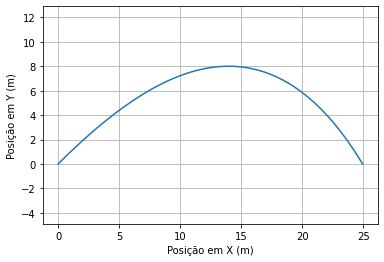

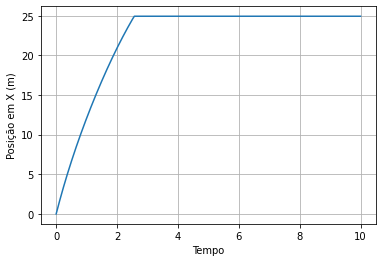

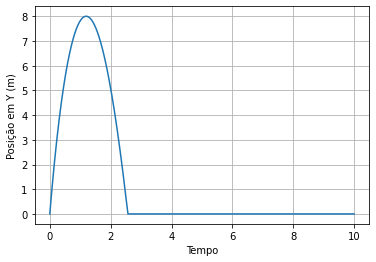

In [4]:
plt.plot(x_odeint, y_odeint)
plt.xlabel("Posição em X (m)")
plt.ylabel("Posição em Y (m)")
plt.grid(True)
plt.axis('equal')
plt.show()

plt.plot(lista_tempo, x_odeint)
plt.xlabel("Tempo")
plt.ylabel("Posição em X (m)")
plt.grid(True)
plt.show()

plt.plot(lista_tempo, y_odeint)
plt.xlabel("Tempo")
plt.ylabel("Posição em Y (m)")
plt.grid(True)
plt.show()

---
---
## Modelo considerando a rotação

---
### Código do modelo considerando a rotação:

In [5]:
def modelo2(lista, t):
    x, y, z, vx, vy, vz, r = lista[0], lista[1], lista[2], lista[3], lista[4], lista[5], lista[6]
    V = math.sqrt(vx ** 2 + vy ** 2 + vz ** 2)
    V2 = math.sqrt(vz ** 2 + vx ** 2)
    
    # Arrays para a força magnus
    Varray = np.array([vx, vy, vz])
    W = np.array([0, r, 0]) 
    
    # Forças magnus
    fmag = cl * math.pi * raio ** 3 * np.cross(W, Varray)    
    fmagx = fmag[0]
    fmagy = fmag[1]
    fmagz = fmag[2]
    
    # Senos e cossenos de teta e phi
    cosf = vy / V
    senf = V2 / V
    
    cost = vz / V2
    sent = vx / V2
    
    # Drag
    d = 1/2 * pa * A * cd * V ** 2
        
    # Equações de posição
    dxdt = vx
    dydt = vy
    dzdt = vz
    
    # Equações de velocidade
    dvxdt = (1 / m) * (-d * senf * sent + fmagx)
    dvydt = (1 / m) * (-d * cosf - m * g + E + fmagy)
    dvzdt = (1 / m) * (-d * senf * cost + fmagz)
    
    # Equação da rotação
    drdt = 0
    
    if y < 0 or z < 0 or x < 0:
        return [0, 0, 0, 0, 0, 0, 0]
    
    lista_return = [dxdt, dydt, dzdt, dvxdt, dvydt, dvzdt, drdt]
    return lista_return

---
### Definindo parâmetros iníciais e rodando odeint:

In [6]:
# Parâmetros
dt = 3 * 10 ** -3
lista_tempo = np.arange(0, 30, dt)

# A massa, o A, a distancia e o raio
raio = 0.11
m = 0.4
A = math.pi * raio ** 2
pa = 1.225 # Densidade do ar
cd = 0.47 # Coeficiente de arrasto de uma esfera
distancia = 17.5 # Distância entre a trave e o escanteio
altura = 2.44 # Altura gol de futebol
g = 9.81
pb = 2
volume = 4 / 3 * math.pi * raio ** 3
cl = 1 # Coeficiente de Magnus

    
# Empuxo
E = pa * volume * g

# Condições iniciais
x0 = 0
vx0 = 20
y0 = 0
vy0 = 10
z0 = 0
vz0 = 5
r0 = 300 / 30 * math.pi
ci = [x0, y0, z0, vx0, vy0, vz0, r0]

odeint_modelo = odeint(modelo2, ci, lista_tempo)
x_odeint = odeint_modelo[:,0]
y_odeint = odeint_modelo[:,1]
z_odeint = odeint_modelo[:,2]
vx_odeint = odeint_modelo[:,3]
vy_odeint = odeint_modelo[:,4]
vz_odeint = odeint_modelo[:,5]
r_odeint = odeint_modelo[:,6]

---
### Gráfico inicial para a validação:

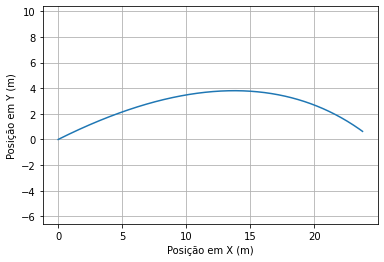

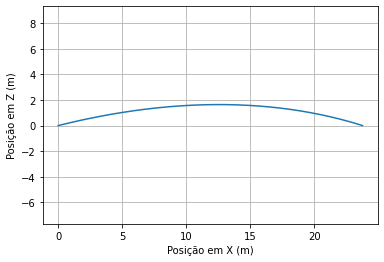

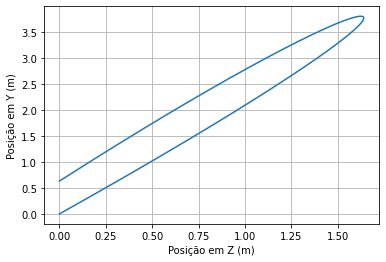

In [7]:
plt.plot(x_odeint, y_odeint)
plt.xlabel("Posição em X (m)")
plt.ylabel("Posição em Y (m)")
plt.axis('equal')
plt.grid(True)
plt.show()

plt.plot(x_odeint, z_odeint)
plt.xlabel("Posição em X (m)")
plt.ylabel("Posição em Z (m)")
plt.axis('equal')
plt.grid(True)
plt.show()

plt.plot(z_odeint, y_odeint)
plt.xlabel("Posição em Z (m)")
plt.ylabel("Posição em Y (m)")
plt.grid(True)
plt.show()

---
---
## Validação do modelo

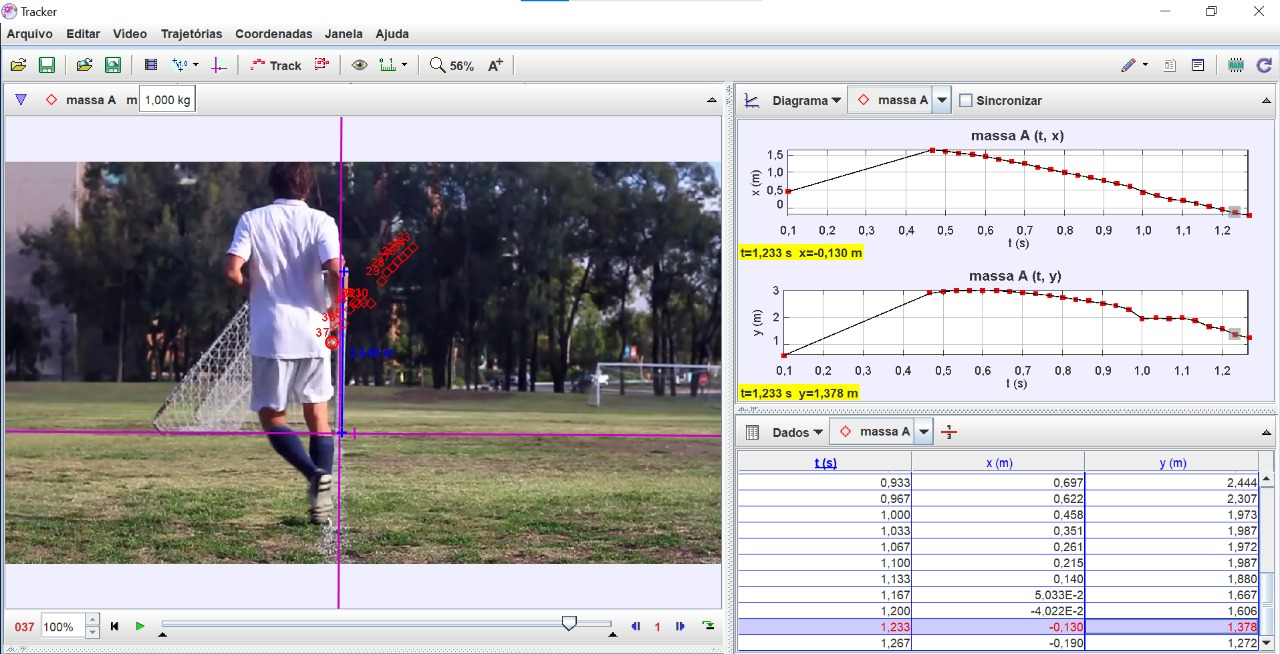

---
### Condições iniciais para a validação:

In [8]:
# Temos um ponto com 1.378 de altura e 1.233 de tempo para fazer o gol
# Temos também de 21.6 para o vx0 e 10.3 para o vy0
# Valores para bater com a validação
x0 = 0
vx0 = 21.6
y0 = 0
vy0 = 10.3
z0 = 0
vz0 = 5.13
r0 = 300 / 30 * math.pi
ci = [x0, y0, z0, vx0, vy0, vz0, r0]


odeint_modelo = odeint(modelo2, ci, lista_tempo)
x_odeint = odeint_modelo[:,0]
y_odeint = odeint_modelo[:,1]
z_odeint = odeint_modelo[:,2]

---
### Achando a altura e tempo para bola entrar no gol:

In [9]:
print("Altura que a bola entra no gol:")
print(y_odeint[-1])

# Loop para achar a altura e tempo que a bola entra no gol
for i in range(len(y_odeint)):
    if z_odeint[i] < 0 and y_odeint[i] > 1.2:
        print("\nTempo para a bola entrar no gol:")
        print(lista_tempo[i])
        break

Altura que a bola entra no gol:
1.37982806235222

Tempo para a bola entrar no gol:
1.605


---
### Gráfico de validação

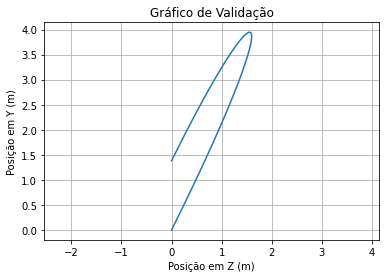

In [10]:
# Plotando o gráfico de validação
plt.plot(z_odeint, y_odeint)
plt.title("Gráfico de Validação")
plt.xlabel("Posição em Z (m)")
plt.ylabel("Posição em Y (m)")
plt.axis('equal')
plt.grid(True)
plt.show()

---
---
## Gráficos conclusivos
---

### Alterando a rotação inicial da bola:

In [11]:
lista_rotacoes = np.arange(250, 450, 5) / 30 * math.pi
lista_odeint = []
tempo_minimo = {}
invalido = {}

for rotacao in lista_rotacoes:
    ci = [x0, y0, z0, vx0, vy0, vz0, rotacao]
    odeint_rotacao = odeint(modelo2, ci, lista_tempo)
    lista_odeint.append(odeint_rotacao)
    lista_odeint_x = list(odeint_rotacao[:,0])
    lista_odeint_y = list(odeint_rotacao[:,1])
    lista_odeint_z = list(odeint_rotacao[:,2])
    for i in range(len(lista_odeint_x)):
        # Se for maior que a distância salvar no dicionario
        if lista_odeint_x[i] > distancia and lista_odeint_z[i] <= 0 and  lista_odeint_y[i] < altura:
            tempo_minimo[rotacao] = lista_tempo[i]
            break
        elif lista_odeint_z[i] < 0 and lista_odeint_x[i] < distancia:
            invalido[rotacao] = -1
            break
        elif lista_odeint_z[i] < 0 and lista_odeint_x[i] > distancia or lista_odeint_x[i] < 0:
            invalido[rotacao] = -1
            break
        elif i == len(lista_odeint_x)-1:
            invalido[rotacao] = -1

C:\Users\fefea\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


---
### Gráfico conclusivo da rotação pelo tempo mínimo para entrar no gol:

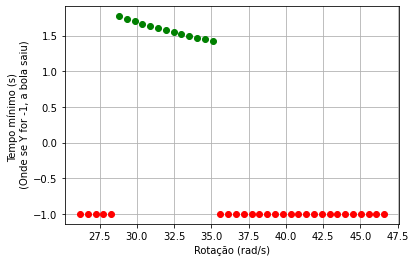

In [12]:
chaves = list(tempo_minimo.keys())
valores = list(tempo_minimo.values())
chave_invalido = list(invalido.keys())
valor_invalido = list(invalido.values())

plt.plot(chaves, valores, 'go')
plt.plot(chave_invalido, valor_invalido, 'ro')
plt.xlabel("Rotação (rad/s)")
plt.ylabel("Tempo mínimo (s) \n (Onde se Y for -1, a bola saiu)")
plt.grid(True)
plt.show()



---
### Rotações minimas e maximas para entrar no gol com velocidade pré-definida

In [13]:
menor_rot = 12931293
maior_rot = 0
for i in tempo_minimo.keys():
    if i < menor_rot:
        menor_rot = i
    if i > maior_rot:
        maior_rot = i
    
print('A menor rotação possível é {} rad/s: '.format(menor_rot))
print('A rotação para fazer um angulo mais rapido é {} rad/s: '.format(maior_rot))

A menor rotação possível é 28.797932657906436 rad/s: 
A rotação para fazer um angulo mais rapido é 35.08111796508602 rad/s: 


---
### Alterando a velocidade e a rotação inicial da bola:

In [ ]:
vxi = 21.6
vyi = 10.3
vzi = 5.13

V = math.sqrt(vxi ** 2 + vyi ** 2 + vzi ** 2)
V2 = math.sqrt(vzi ** 2 + vxi ** 2)
    
# Senos e cossenos de teta e phi
cosf = vyi / V
senf = V2 / V  
cost = vzi / V2
sent = vxi / V2

listaV = np.arange(20, 26, 0.1)

lista_rotacoes = np.arange(200, 500, 5) / 30 * math.pi
lista_odeint_vr = []
tempo_minimo_vr = []
rotacoes_vr = []
modulos_velocidades = []

tempo_minimo_vr_invalido = []
modulos_velocidades_invalido = []
rotacoes_vr_invalido = []

for rotacao in lista_rotacoes:
    for j in listaV:
        vy = j * cosf
        vx = j * senf * sent
        vz = j * senf * cost
        ci = [x0, y0, z0, vx, vy, vz, rotacao]
        odeint_rotacao_velocidade = odeint(modelo2, ci, lista_tempo)
        lista_odeint_vr.append(odeint_rotacao_velocidade)
        lista_odeint_x = list(odeint_rotacao_velocidade[:,0])
        lista_odeint_y = list(odeint_rotacao_velocidade[:,1])
        lista_odeint_z = list(odeint_rotacao_velocidade[:,2])
        for i in range(len(lista_odeint_x)):
            # Se for maior que a distância salvar no dicionario
            if lista_odeint_x[i] > distancia and lista_odeint_z[i] <= 0 and  lista_odeint_y[i] < altura:
                tempo_minimo_vr.append(lista_tempo[i])
                modulos_velocidades.append(math.sqrt(vx**2 + vy**2 + vz**2))
                rotacoes_vr.append(rotacao)
                break

---
### Gráfico conclusivo da rotação e da velocidade pelo tempo mínimo para entrar no gol:

In [ ]:
# PRECISA RODAR O CÓDIGO DE CIMA ~3 VEZES ATÉ DAR CERTO

fig = plt.figure()
ax = fig.gca(projection='3d')
'''ax.axes.set_xlim3d(left=0, right=30) 
ax.axes.set_ylim3d(bottom=0, top=30) 
ax.axes.set_zlim3d(bottom=0, top=30) '''

ax.set_title('Tempo para fazer um gol alterando a velocidade e rotação')
ax.set_xlabel('Rotação (rad/s)')
ax.set_ylabel('Velocidade (m/s)')
ax.set_zlabel('Tempo para a bola entrar no gol (s)')

#ax.plot(rotacoes_vr, modulos_velocidades, tempo_minimo_vr, 'go', label='Entraram', markersize=5)
ax.plot_trisurf(rotacoes_vr, modulos_velocidades, tempo_minimo_vr, cmap=plt.cm.Spectral)
ax.legend()

---
### Obtendo a rotação e velocidade minima

In [ ]:
rotacao_minima = 0
velocidade_minima = 0
rotacao_maxima= 0
velocidade_maxima = 0

menor = 12931293
maior = 0
for i in range(len(tempo_minimo_vr)):
    if tempo_minimo_vr[i] < menor:
        menor = tempo_minimo_vr[i]
        rotacao_minima = rotacoes_vr[i]
        velocidade_minima = modulos_velocidades[i]
        vymin = velocidade_minima * cosf
        vxmin = velocidade_minima * senf * sent
        vzmin = velocidade_minima * senf * cost

    if tempo_minimo_vr[i] > maior:
        maior = tempo_minimo_vr[i]
        rotacao_maxima = rotacoes_vr[i]
        velocidade_maxima = modulos_velocidades[i]
        vymax = velocidade_maxima * cosf
        vxmax = velocidade_maxima * senf * sent
        vzmax = velocidade_maxima * senf * cost
print('Para obter o menor tempo possível ({} segundos):'.format(menor))    
print('A rotação necessária é: {}'.format(rotacao_minima))
print('As velocidades, em x, y e z são: {}, {} e {}'.format(vxmin, vymin, vzmin))
print('===================================================================================================')
print('Para obter o maior tempo possível ({} segundos):'.format(maior))   
print('A rotação necessária é: {}'.format(rotacao_maxima))
print('As velocidades, em x, y e z são: {}, {} e {}'.format(vxmax, vymax, vzmax))

--- 
### Gráfico em 3d com a rotação inicial e velocidades minimas:

In [ ]:
# Odeint da rotação certa
ci = [x0, y0, z0, vxmin, vymin, vzmin, rotacao_minima] # Utilizando a rotação e velocidades minimas obtida no gráfico conclusivo
odeint_rotacao = odeint(modelo2, ci, lista_tempo)
x_odeint = odeint_rotacao[:,0]
y_odeint = odeint_rotacao[:,1]
z_odeint = odeint_rotacao[:,2]

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.axes.set_xlim3d(left=0, right=20) 
ax.axes.set_ylim3d(bottom=0, top=15) 
ax.axes.set_zlim3d(bottom=0, top=10) 

ax.set_title('Trajetória da bola')
ax.set_xlabel('X(t)')
ax.set_ylabel('Z(t)')
ax.set_zlabel('Y(t)')

ax.plot(x_odeint, z_odeint, y_odeint, label='Curva da bola')
ax.legend()

---
### Gráfico animado:

In [ ]:
get_ipython().magic('matplotlib qt5')
%matplotlib qt5

# Odeint da rotação certa
ci = [x0, y0, z0, vxmin, vymin, vzmin, rotacao_minima] 
odeint_rotacao = odeint(modelo2, ci, lista_tempo)
x_odeint = odeint_rotacao[:,0]
y_odeint = odeint_rotacao[:,1]
z_odeint = odeint_rotacao[:,2]


def func(num, dataSet, line):
    line.set_data(dataSet[0:2, :num])    
    line.set_3d_properties(dataSet[2, :num])    
    return line

dataSet = np.array([x_odeint, z_odeint, y_odeint])
numDataPoints = len(z_odeint)
 
# Criando os objetos de matplotlib
fig = plt.figure()
ax = Axes3D(fig)
 
line = plt.plot(dataSet[0], dataSet[1], dataSet[2], lw=2, c='g')[0] # For line plot
 
# Propriedades dos eixos
ax.axes.set_xlim3d(left=0, right=20) 
ax.axes.set_ylim3d(bottom=0, top=15) 
ax.axes.set_zlim3d(bottom=0, top=10) 
ax.set_xlabel('X(t)')
ax.set_ylabel('Z(t)')
ax.set_zlabel('Y(t)')
ax.set_title('Trajetória da bola')
 
# Criando o objeto da animação
line_ani = animation.FuncAnimation(fig, func, frames=numDataPoints, fargs=(dataSet,line), interval=1, blit=False)
'''f = r"c://Users/fefea/Desktop/animation.gif" 
writergif = animation.PillowWriter(fps=30) 
line_ani.save(f, writer=writergif)'''
 
 
plt.show()